In [2]:
import pickle
import pandas as pd
import numpy as np
import scipy as sp
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adata = sc.read('data/iPS/log_normalised_counts.csv')
adata = adata.transpose()
cell_stages = pd.read_csv('data/iPS/cell_diff_stages.tsv', sep = '\t', index_col = 0)
cell_stages = cell_stages.sort_index()
cell_stages = cell_stages.set_index('cell')
adata.obs['cell_differentiation'] = cell_stages['cell_differentiation']
adata.obs['pseudotime'] = cell_stages['pseudo']
adata.obs['day'] = cell_stages['day']

In [4]:
with open('results/nmf_ips.pickle', 'rb') as f:
    nmf_ips = pickle.load(f)

with open('results/nmf_defendo.pickle', 'rb') as f:
    nmf_d = pickle.load(f)

with open('results/nmf_mesendo.pickle', 'rb') as f:
    nmf_m = pickle.load(f)

In [5]:
def min_max_norm(arr, axis = None):
    armin = np.min(arr, axis = axis)
    armax = np.max(arr, axis = axis)
    return (arr - armin) / (armax - armin)

In [6]:
factor_ips_norm = min_max_norm(nmf_ips.coef(), axis = 1)
factor_d_norm = min_max_norm(nmf_d.coef(), axis = 1)
factor_m_norm = min_max_norm(nmf_m.coef(), axis = 1)

In [8]:
?sns.heatmap

Text(0.5, 1.0, 'iPS')

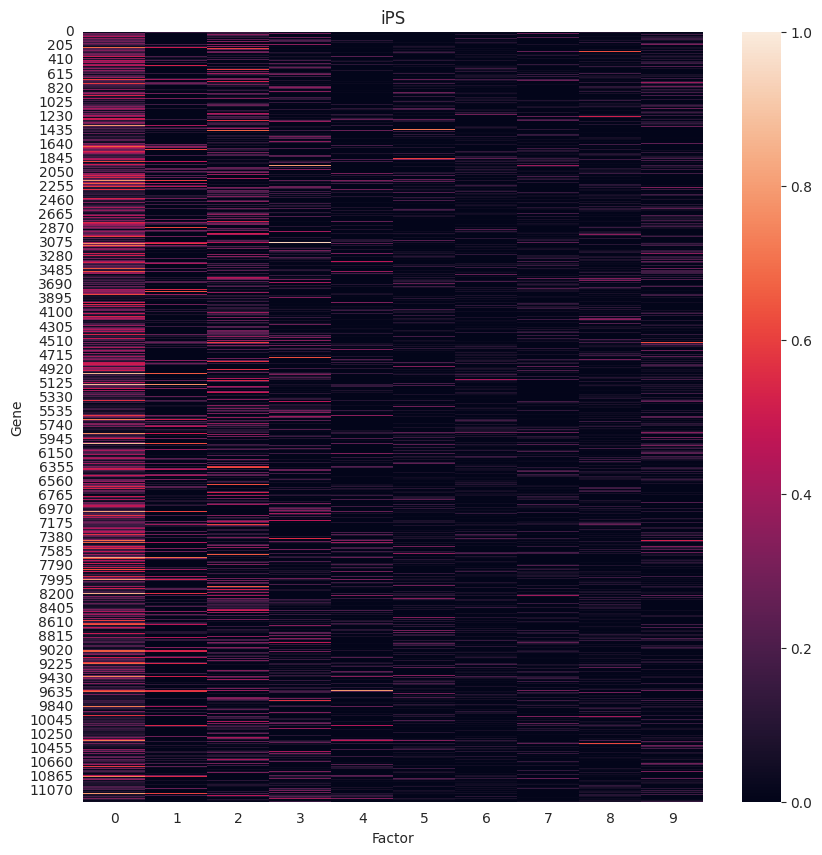

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(factor_ips_norm.T)
plt.xlabel("Factor")
plt.ylabel("Gene")
plt.title("iPS")

Text(0.5, 1.0, 'Defendo')

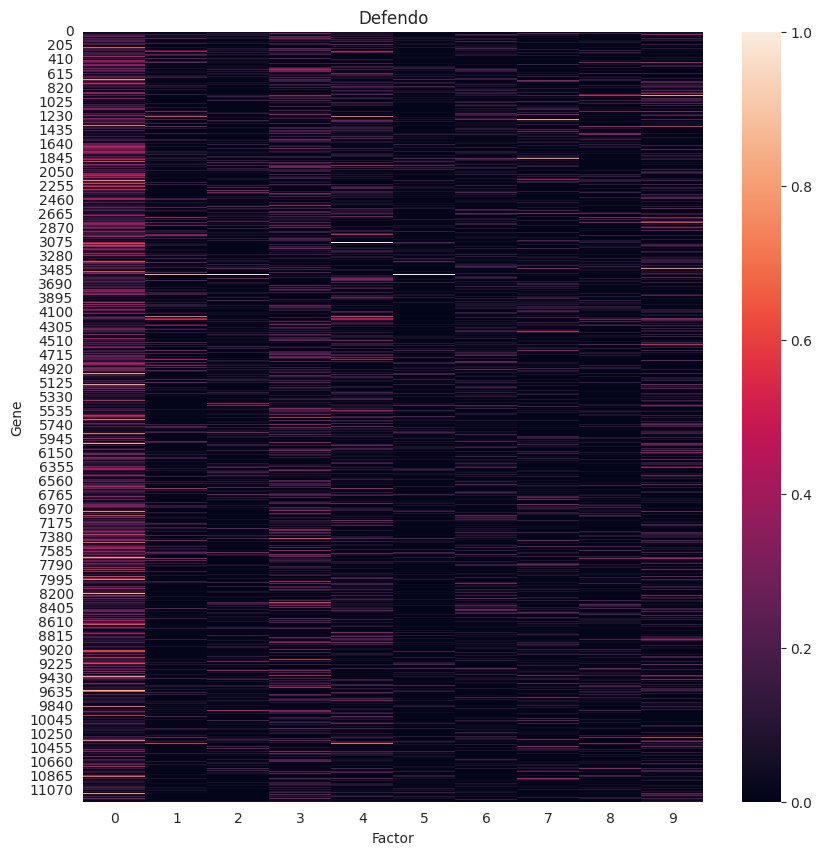

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(factor_d_norm.T)
plt.xlabel("Factor")
plt.ylabel("Gene")
plt.title("Defendo")

Text(0.5, 1.0, 'Msendo')

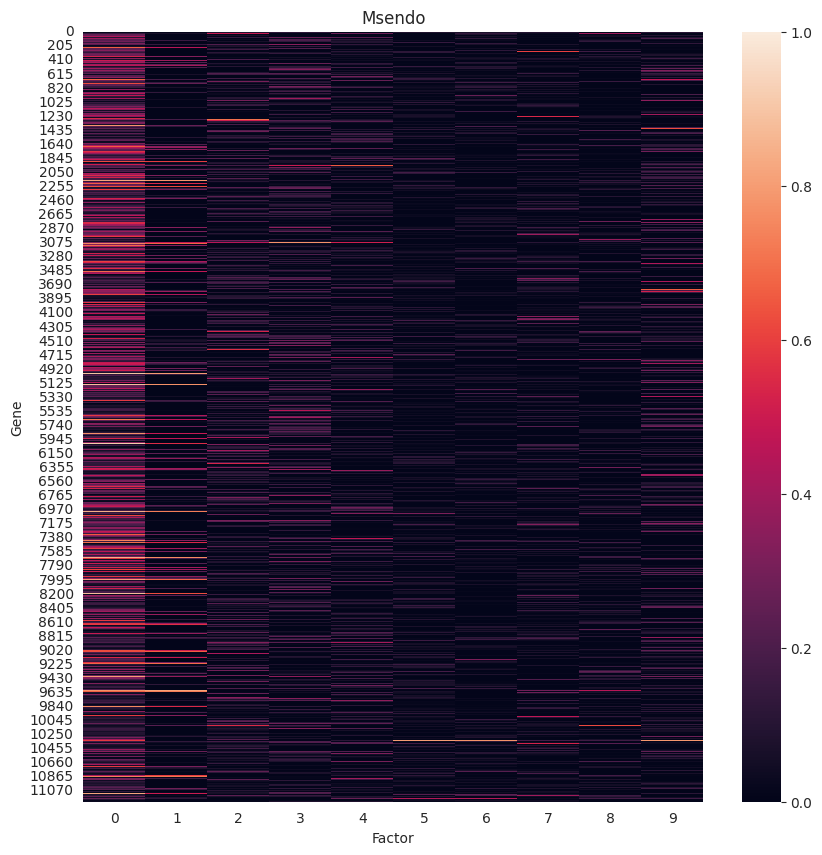

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(factor_m_norm.T)
plt.xlabel("Factor")
plt.ylabel("Gene")
plt.title("Msendo")

In [12]:
def pairwise_cor(mat1, mat2):
    return [[sp.stats.pearsonr(np.ravel(mat1[i]), np.ravel(mat2[j]))[0] for i in range(mat1.shape[0])] for j in range(mat2.shape[0])]

Text(0.5, 80.7222222222222, 'iPS')

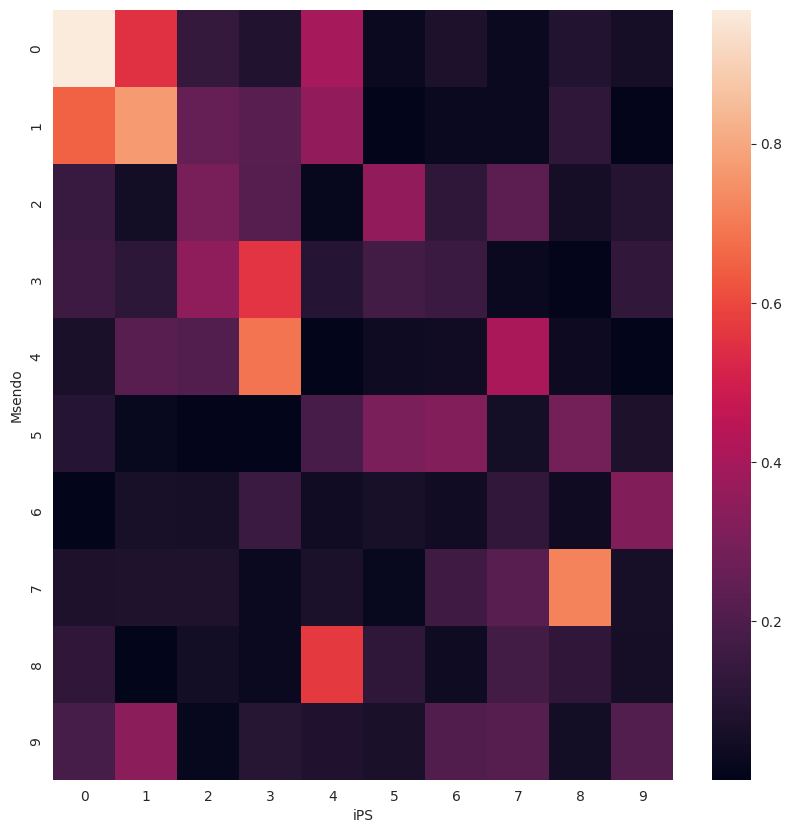

In [41]:
# pearson correlation of factors
ips_m_cor = np.abs(pairwise_cor(nmf_ips.coef(), nmf_m.coef()))
plt.figure(figsize=(10,10))
sns.heatmap(ips_m_cor)
plt.ylabel("Msendo")
plt.xlabel("iPS")

Text(0.5, 80.7222222222222, 'Msendo')

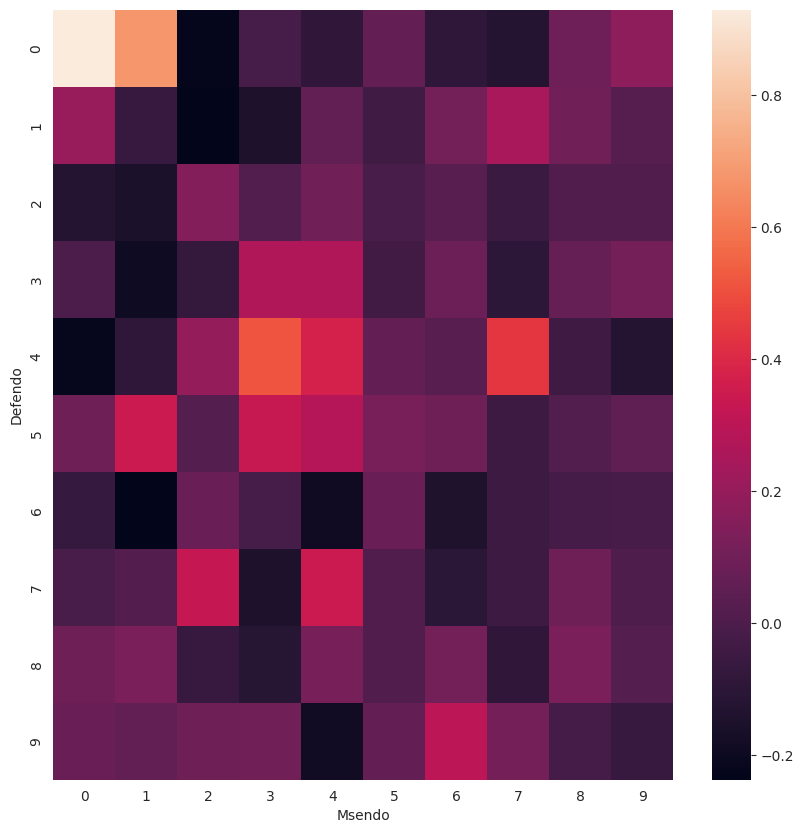

In [16]:
m_d_cor = pairwise_cor(nmf_m.coef(), nmf_d.coef())
plt.figure(figsize=(10,10))
sns.heatmap(m_d_cor)
plt.ylabel("Defendo")
plt.xlabel("Msendo")

In [47]:
def threshold(arr, cutoff = None):
    if cutoff is None:
        cutoff = np.median(arr)

    return (arr > cutoff).astype('int')

def map_activation(arr, cutoff = None):
    return np.apply_along_axis(lambda x: threshold(x, cutoff),
                               axis=1,
                               arr=arr
                               )

Text(0.5, 1.0, 'iPS')

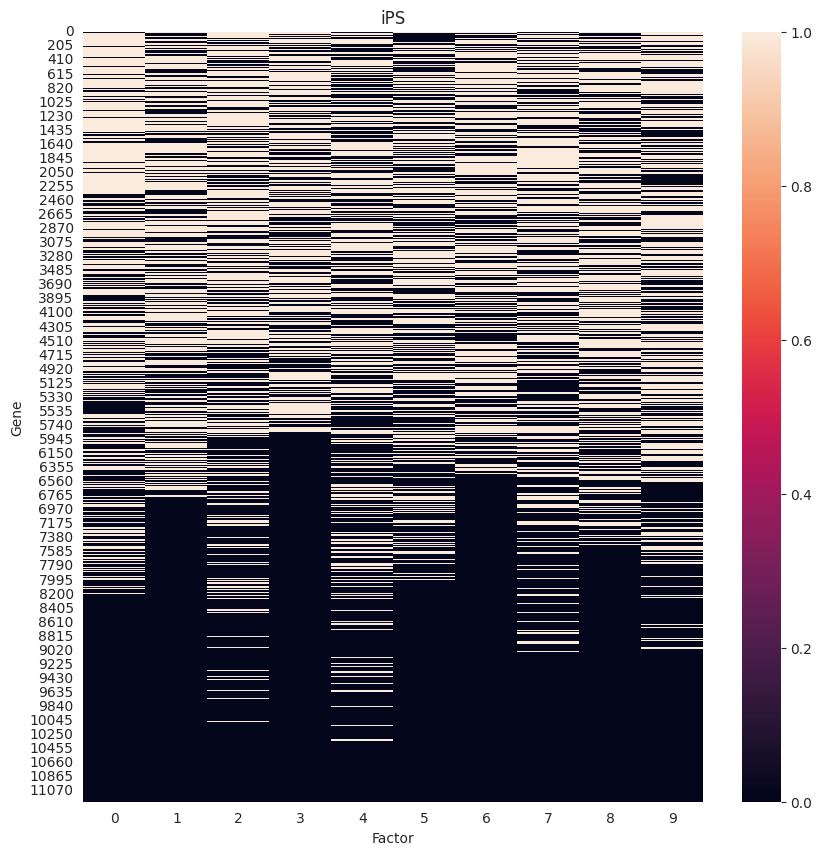

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(map_activation(factor_ips_norm).T)
plt.xlabel("Factor")
plt.ylabel("Gene")
plt.title("iPS")

Text(0.5, 1.0, 'Defendo')

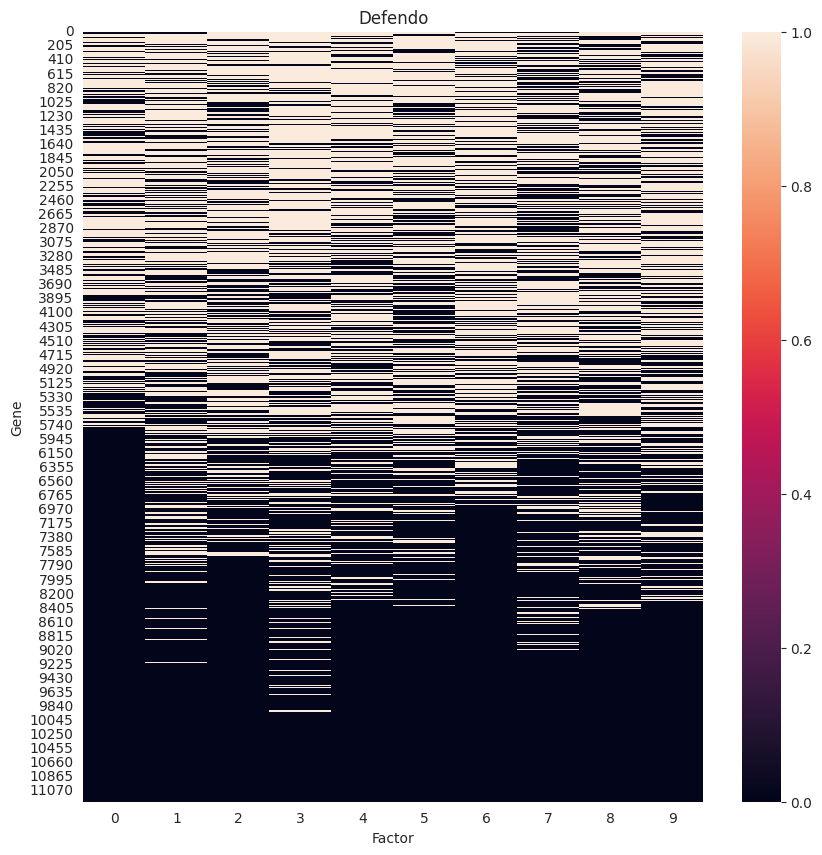

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(map_activation(factor_d_norm).T)
plt.xlabel("Factor")
plt.ylabel("Gene")
plt.title("Defendo")

Text(0.5, 1.0, 'Msendo')

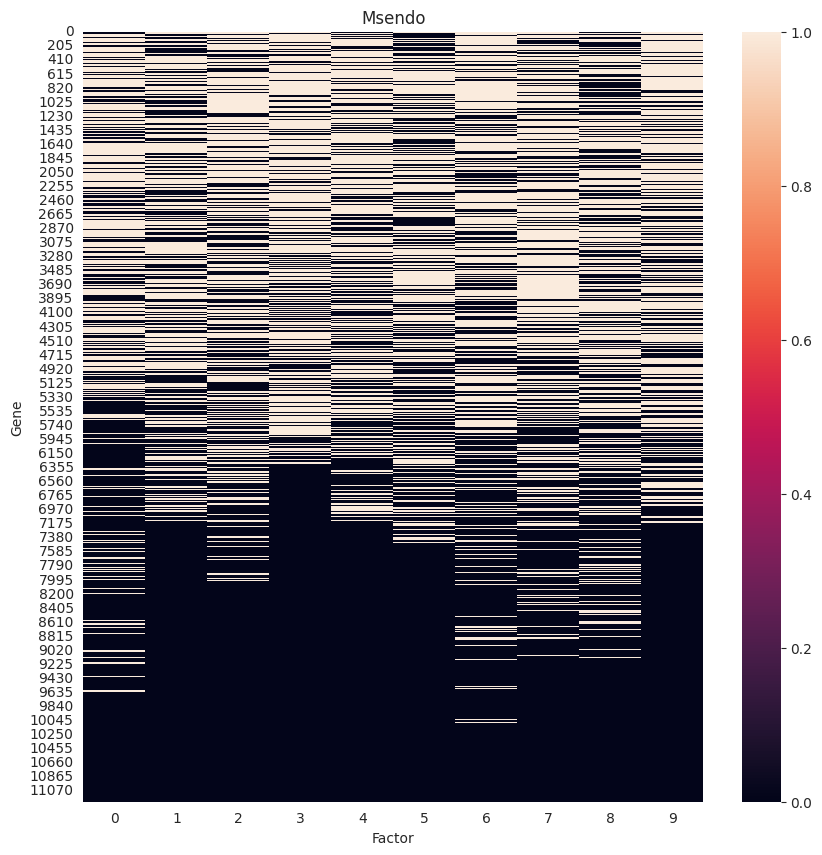

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(map_activation(factor_m_norm).T)
plt.xlabel("Factor")
plt.ylabel("Gene")
plt.title("Msendo")